In [1]:
# Learning pvlib
# http://pvlib-python.readthedocs.io/en/latest/package_overview.html

In [2]:
# set-up
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import pvlib
scipy.__version__

'1.1.0'

In [3]:
naive_times = pd.DatetimeIndex(start='2015', end='2016', freq='1h')

# very approximate
# latitude, longitude, name, altitude, timezone
coordinates = [(30, -110, 'Tucson', 700, 'Etc/GMT+7'),
               (35, -105, 'Albuquerque', 1500, 'Etc/GMT+7'),
               (40, -120, 'San Francisco', 10, 'Etc/GMT+8'),
               (50, 10, 'Berlin', 34, 'Etc/GMT-1'),
               (47.190295, 8.821744, 'Maienberg', 450, 'Etc/GMT-1')]

In [4]:
# get the module and inverter specifications from SAM
# http://pvlib-python.readthedocs.io/en/latest/generated/pvlib.pvsystem.retrieve_sam.html
sandia_modules = pvlib.pvsystem.retrieve_sam('SandiaMod')
sapm_inverters = pvlib.pvsystem.retrieve_sam('cecinverter')
module = sandia_modules['Canadian_Solar_CS5P_220M___2009_']
inverter = sapm_inverters['ABB__MICRO_0_25_I_OUTD_US_208_208V__CEC_2014_']

# specify constant ambient air temp and wind for simplicity
temp_air = 20
wind_speed = 0

In [5]:
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 500)
#sandia_modules
vendor = 'SunPower'
cols = [col for col in sandia_modules.columns if vendor in col]
sandia_modules[cols]

,SunPower_128_Cell_Module___2009_,SunPower_128_Cell_Module__2009__E__,SunPower_72_Cell_prototype___2003_,SunPower_SP305_GEN_C_Module___2008_,SunPower_SP305_GEN_C_Module__2008__E__,SunPower_SPR_200_BLK__2004__E__,SunPower_SPR_200_BLK_U_Module___2008_,SunPower_SPR_200_BLK_U_Module__2008__E__,SunPower_SPR_205_BLK__2007__E__,SunPower_SPR_210_BLK__2007__E__,SunPower_SPR_210_WHT___2006_,SunPower_SPR_210_WHT__2004__E__,SunPower_SPR_210_WHT__2007__E__,SunPower_SPR_210_WHT_U_Module___2008_,SunPower_SPR_210_WHT_U_Module__2008__E__,SunPower_SPR_215_WHT__2007__E__,SunPower_SPR_220__CS____2006_,SunPower_SPR_220__PVL____2006_,SunPower_SPR_220_BLK_U_Module___2008_,SunPower_SPR_220_BLK_U_Module__2008__E__,SunPower_SPR_225_BLK__2007__E__,SunPower_SPR_225_WHT__2007__E__,SunPower_SPR_230_WHT__2007__E__,SunPower_SPR_300_WHT__2007__E__,SunPower_SPR_305_WHT___2009_,SunPower_SPR_305_WHT__2007__E__,SunPower_SPR_315E_WHT__2007__E__,SunPower_SPR_90__2004__E__,SunPower_SunTile__2007__E__
Vintage,2009,2009 (E),2003,2008,2008 (E),2004 (E),2008,2008 (E),2007 (E),2007 (E),2006,2004 (E),2007 (E),2008,2008 (E),2007 (E),2006,2006,2008,2008 (E),2007 (E),2007 (E),2007 (E),2007 (E),2009,2007 (E),2007 (E),2004 (E),2007 (E)
Area,2.144,2.144,1.32,1.63,1.63,1.244,1.244,1.244,1.244,1.244,1.244,1.244,1.244,1.244,1.244,1.244,1.244,1.244,1.244,1.244,1.244,1.244,1.244,1.631,1.631,1.631,1.631,0.547,0.48
Material,c-Si,c-Si,c-Si,c-Si,c-Si,c-Si,c-Si,c-Si,c-Si,c-Si,c-Si,c-Si,c-Si,c-Si,c-Si,c-Si,c-Si,c-Si,c-Si,c-Si,c-Si,c-Si,c-Si,c-Si,c-Si,c-Si,c-Si,c-Si,c-Si
Cells_in_Series,128,128,72,96,96,72,72,72,72,72,72,72,72,72,72,72,72,72,72,72,72,72,72,96,96,96,96,32,22
Parallel_Strings,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
Isco,5.859,5.87,5.738,5.959,5.96,5.4,5.468,5.4,5.53,5.75,5.835,5.65,5.75,5.61,5.75,5.8,5.988,5.975,5.826,5.75,5.87,5.87,5.99,5.87,5.92,5.96,6.14,5.5,5.65
Voco,87.235,85.3,48.793,64.708,64.2,47.8,47.832,47.8,47.8,47.7,48.47,47.75,47.7,47.757,47.7,48.3,48.53,48.47,49.077,48.6,48.5,48.5,48.7,64,65.31,64.2,64.6,21.2,14.6
Impo,5.467,5.49,5.32,5.526,5.58,5,5.086,5,5.13,5.25,5.415,5.25,5.25,5.193,5.25,5.4,5.56,5.547,5.431,5.37,5.49,5.49,5.61,5.49,5.59,5.58,5.76,5.1,5.25
Vmpo,72.739,72.9,40.577,53.665,54.7,40,39.335,40,40,40,40.05,40,40,38.816,40,39.8,40.03,40.06,40.762,41,41,41,41,54.7,54.43,54.7,54.7,17.7,12
Aisc,0.000313,0.000313,0.000395,0.000334,0.000334,0.00041,0.000179,0.000179,0.00063,0.00061,0.00018,0.000395,0.00061,4.4e-05,4.4e-05,0.00061,0.000232,0.000184,0.000388,0.000388,0.0006,0.0006,0.00058,0.0006,0.0004,0.00059,0.00057,0.000395,0.00063


In [33]:
cec_modules = pvlib.pvsystem.retrieve_sam('cecmod')
#cec_modules
vendor = 'SunPower'
cols = [col for col in cec_modules.columns if vendor in col]
cec_modules[cols]

# more up-to-date than sandia-modules

,SunPower_PL_PLT_63L_BLK_U,SunPower_PL_SUNP_SPR_215,SunPower_PL_SUNP_SPR_290,SunPower_PL_SUNP_SPR_305,SunPower_PL_SUNP_SPR_308E,SunPower_PL_SUNP_SPR_310,SunPower_PL_SUNP_SPR_315E,SunPower_PL_SUNP_SPR_318E,SunPower_SER_220P,SunPower_SER_228P,SunPower_SER_235P,SunPower_SPR_200_BLK_U,SunPower_SPR_200_WHT_U,SunPower_SPR_205_BLK_U,SunPower_SPR_208_WHT_U,SunPower_SPR_210_BLK_U,SunPower_SPR_210_WHT_U,SunPower_SPR_215_WHT_U,SunPower_SPR_217_WHT_U,SunPower_SPR_220_BLK_U,SunPower_SPR_220_WHT_U,SunPower_SPR_225_BLK_U,SunPower_SPR_225E_BLK_D,SunPower_SPR_225E_BLK_U_ACPV,SunPower_SPR_225E_WHT_D,SunPower_SPR_225NE_BLK_D,SunPower_SPR_230_WHT_U,SunPower_SPR_230E_WHT_D,SunPower_SPR_230NE_BLK_D,SunPower_SPR_230NE_BLK_U_ACPV,SunPower_SPR_235NE_WHT_D,SunPower_SPR_238E_WHT_D,SunPower_SPR_240E_WHT_D,SunPower_SPR_240E_WHT_U_ACPV,SunPower_SPR_245NE_WHT_D,SunPower_SPR_245NE_WHT_U_240_ACPV,SunPower_SPR_245NE_WHT_U_ACPV,SunPower_SPR_250NX_BLK_D,SunPower_SPR_290_WHT_U,SunPower_SPR_295E_WHT_D,SunPower_SPR_295E_WHT_U,SunPower_SPR_300E_WHT_D,SunPower_SPR_300NE_WHT_D,SunPower_SPR_305_WHT_U,SunPower_SPR_305E_WHT_D,SunPower_SPR_305E_WHT_U,SunPower_SPR_305NE_WHT_D,SunPower_SPR_308E_WHT_D,SunPower_SPR_308NE_WHT_D,SunPower_SPR_310_WHT_U,SunPower_SPR_310E_WHT_D,SunPower_SPR_310E_WHT_U,SunPower_SPR_315E_WHT_D,SunPower_SPR_315E_WHT_U,SunPower_SPR_315NE_WHT_D,SunPower_SPR_318E_WHT_D,SunPower_SPR_320E_WHT_D,SunPower_SPR_320NE_WHT_D,SunPower_SPR_327NE_WHT_D,SunPower_SPR_335NX_BLK_D,SunPower_SPR_343J_WHT_D,SunPower_SPR_343NJ_WHT_D,SunPower_SPR_343NX_BLK_D,SunPower_SPR_343NX_WHT_D,SunPower_SPR_390E_WHT_D,SunPower_SPR_400E_WHT_D,SunPower_SPR_410NE_WHT_D,SunPower_SPR_415E_WHT_D,SunPower_SPR_425E_WHT_D,SunPower_SPR_435NE_WHT_D,SunPower_SPR_440NE_WHT_D,SunPower_SPR_445J_WHT_D,SunPower_SPR_445NJ_WHT_D,SunPower_SPR_445NX_WHT_D,SunPower_SPR_76R_BLK_U,SunPower_SPR_76RE_BLK_U,SunPower_SPR_E18_295_COM,SunPower_SPR_E18_300_COM,SunPower_SPR_E18_305_COM,SunPower_SPR_E19_235,SunPower_SPR_E19_240,SunPower_SPR_E19_245,SunPower_SPR_E19_310_COM,SunPower_SPR_E19_315,SunPower_SPR_E19_315_COM,SunPower_SPR_E19_320,SunPower_SPR_E19_320_C_AC,SunPower_SPR_E19_320_COM,SunPower_SPR_E19_410_COM,SunPower_SPR_E20_245,SunPower_SPR_E20_245_A_AC,SunPower_SPR_E20_327,SunPower_SPR_E20_327_C_AC,SunPower_SPR_E20_327_COM,SunPower_SPR_E20_327_COM_LAM,SunPower_SPR_E20_327_COM_T5,SunPower_SPR_E20_435_COM,SunPower_SPR_E20_440_COM,SunPower_SPR_P17_325_COM,SunPower_SPR_P17_330_COM,SunPower_SPR_P17_335_COM,SunPower_SPR_P17_340_COM,SunPower_SPR_P17_345_COM,SunPower_SPR_P17_350_COM,SunPower_SPR_P17_355_COM,SunPower_SPR_X20_245,SunPower_SPR_X20_250_BLK,SunPower_SPR_X20_250_BLK_A_AC,SunPower_SPR_X20_250_BLK_LAM,SunPower_SPR_X20_255,SunPower_SPR_X20_327,SunPower_SPR_X20_327_BLK,SunPower_SPR_X20_327_BLK_C_AC,SunPower_SPR_X20_327_C_AC,SunPower_SPR_X20_327_COM,SunPower_SPR_X20_445_COM,SunPower_SPR_X21_255,SunPower_SPR_X21_335,SunPower_SPR_X21_335_BLK,SunPower_SPR_X21_335_BLK_C_AC,SunPower_SPR_X21_335_C_AC,SunPower_SPR_X21_345,SunPower_SPR_X21_345_C_AC,SunPower_SPR_X21_345_COM,SunPower_SPR_X22_335_BLK,SunPower_SPR_X22_340_BLK,SunPower_SPR_X22_345_BLK,SunPower_SPR_X22_359,SunPower_SPR_X22_360,SunPower_SPR_X22_360_C_AC,SunPower_SPR_X22_360_COM,SunPower_SPR_X22_460_COM,SunPower_SPR_X22_470_COM,SunPower_SPR_X22_475_COM,SunPower_SPV_P17_345_COM,SunPower_T5_SER_235P,SunPower_T5_SPR_290,SunPower_T5_SPR_305,SunPower_T5_SPR_305E,SunPower_T5_SPR_308E,SunPower_T5_SPR_310,SunPower_T5_SPR_315,SunPower_T5_SPR_315E,SunPower_T5_SPR_318E,SunPower_T5_SPR_320E,SunPower_T5_SPR_327
BIPV,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N
Date,4/28/2008,3/2/2011,7/15/2009,7/15/2009,3/2/2011,7/15/2009,7/15/2009,7/12/2010,6/14/2010,6/14/2010,3/2/2011,7/9/2009,7/9/2009,7/9/2009,2/11/2010,7/9/2009,7/12/2010,7/12/2

In [6]:
system = {'module': module, 'inverter': inverter,
              'surface_azimuth': 180}
energies = {}

In [35]:
# procedural approach
for latitude, longitude, name, altitude, timezone in coordinates:
        times = naive_times.tz_localize(timezone)
        system['surface_tilt'] = latitude
        solpos = pvlib.solarposition.get_solarposition(times, latitude, longitude)
        dni_extra = pvlib.irradiance.extraradiation(times)
        dni_extra = pd.Series(dni_extra, index=times)
        airmass = pvlib.atmosphere.relativeairmass(solpos['apparent_zenith'])
        pressure = pvlib.atmosphere.alt2pres(altitude)
        am_abs = pvlib.atmosphere.absoluteairmass(airmass, pressure)
        tl = pvlib.clearsky.lookup_linke_turbidity(times, latitude, longitude)
        cs = pvlib.clearsky.ineichen(solpos['apparent_zenith'], am_abs, tl,
                                     dni_extra=dni_extra, altitude=altitude)
        aoi = pvlib.irradiance.aoi(system['surface_tilt'], system['surface_azimuth'],
                                   solpos['apparent_zenith'], solpos['azimuth'])
        total_irrad = pvlib.irradiance.total_irrad(system['surface_tilt'],
                                                   system['surface_azimuth'],
                                                   solpos['apparent_zenith'],
                                                   solpos['azimuth'],
                                                   cs['dni'], cs['ghi'], cs['dhi'],
                                                   dni_extra=dni_extra,
                                                   model='haydavies')
        #print(name)
        #print(total_irrad)  #hourly data
        temps = pvlib.pvsystem.sapm_celltemp(total_irrad['poa_global'],
                                             wind_speed, temp_air)
        effective_irradiance = pvlib.pvsystem.sapm_effective_irradiance(
            total_irrad['poa_direct'], total_irrad['poa_diffuse'],
            am_abs, aoi, module)
        dc = pvlib.pvsystem.sapm(effective_irradiance, temps['temp_cell'], module)
        ac = pvlib.pvsystem.snlinverter(dc['v_mp'], dc['p_mp'], inverter)
        annual_energy = ac.sum()
        energies[name] = annual_energy

In [8]:
# # object-oriented (class) approach
# from pvlib.pvsystem import PVSystem
# from pvlib.location import Location
# from pvlib.modelchain import ModelChain

# system = PVSystem(module_parameters=module,
#                   inverter_parameters=inverter)

# energies = {}

# for latitude, longitude, name, altitude, timezone in coordinates:
#         location = Location(latitude, longitude, name=name, altitude=altitude,
#                             tz=timezone)
#         mc = ModelChain(system, location,
#                         orientation_strategy='south_at_latitude_tilt')
#         mc.run_model(naive_times.tz_localize(timezone))
#         annual_energy = mc.ac.sum()
#         energies[name] = annual_energy

In [9]:
energies = pd.Series(energies)

In [10]:
# based on the parameters specified above, these are in W*hrs
print(energies.round(0))

Albuquerque      511711.0
Berlin           398047.0
Maienberg        483274.0
San Francisco    454729.0
Tucson           479080.0
dtype: float64


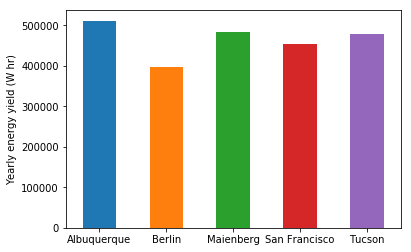

In [11]:
energies.plot(kind='bar', rot=0)
plt.ylabel('Yearly energy yield (W hr)')
plt.show()

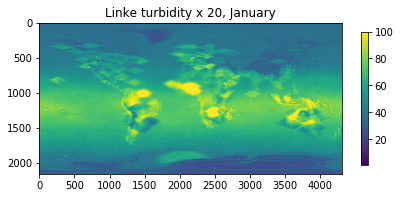

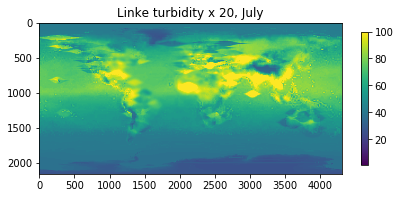

In [12]:
# testing

import calendar
import os
import tables

pvlib_path = os.path.dirname(os.path.abspath(pvlib.clearsky.__file__))
filepath = os.path.join(pvlib_path, 'data', 'LinkeTurbidities.h5')

def plot_turbidity_map(month, vmin=1, vmax=100):
        plt.figure();
        with tables.open_file(filepath) as lt_h5_file:
            ltdata = lt_h5_file.root.LinkeTurbidity[:, :, month-1]
        plt.imshow(ltdata, vmin=vmin, vmax=vmax);
        # data is in units of 20 x turbidity
        plt.title('Linke turbidity x 20, ' + calendar.month_name[month]);
        plt.colorbar(shrink=0.5);
        plt.tight_layout();
    
plot_turbidity_map(1)
plot_turbidity_map(7)
plt.show()

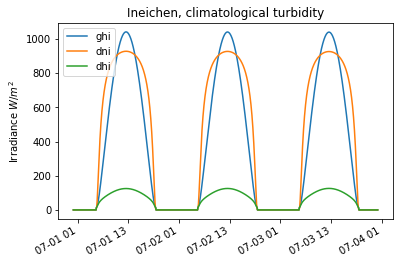

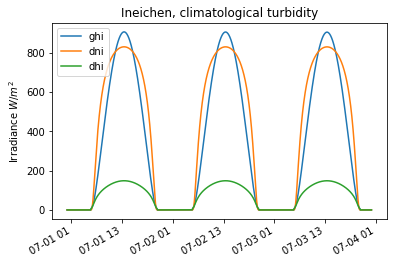

In [26]:
# testing more

import itertools
import matplotlib.pyplot as plt
import pandas as pd
import pvlib
from pvlib import clearsky, atmosphere
from pvlib.location import Location
import pytz

tus = Location(32.2, -111, 'US/Arizona', 700, 'Tucson')
times = pd.DatetimeIndex(start='2016-07-01', end='2016-07-04', freq='1min', tz=tus.tz)
cs = tus.get_clearsky(times)  # ineichen with climatology table by default
cs.plot();
plt.ylabel('Irradiance $W/m^2$');
plt.title('Ineichen, climatological turbidity');
plt.show()

maienberg = Location(47.190295, 8.821744, 'Europe/Zurich', 450, 'Maienberg')
times = pd.DatetimeIndex(start='2016-07-01', end='2016-07-04', freq='1min', tz=maienberg.tz)
cs = maienberg.get_clearsky(times)  # ineichen with climatology table by default
cs.plot();
plt.ylabel('Irradiance $W/m^2$');
plt.title('Ineichen, climatological turbidity');
plt.show()


In [24]:
#pytz.all_timezones

In [ ]:
# Global Horizontal Irradiance (GHI)
# Direct Normal Irradiance (DNI)
# Diffuse Horizontal Irradiance (DHI)
#  GHI = DHI + DNI · cos (θ) (where θ is the solar zenith angle)

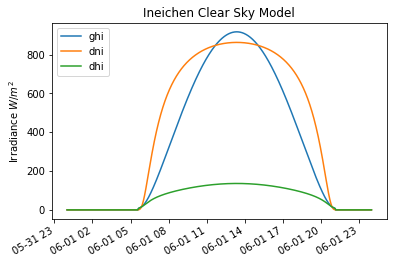

In [29]:
# and more testing

#latitude, longitude, tz, altitude, name = 32.2, -111, 'US/Arizona', 700, 'Tucson'
latitude, longitude, tz, altitude, name = 47.190295, 8.821744, 'Europe/Zurich', 450, 'Maienberg'
times = pd.date_range(start='2018-06-01', end='2018-06-02', freq='1Min', tz=tz)
solpos = pvlib.solarposition.get_solarposition(times, latitude, longitude)
apparent_zenith = solpos['apparent_zenith']
airmass = pvlib.atmosphere.relativeairmass(apparent_zenith)
pressure = pvlib.atmosphere.alt2pres(altitude)
airmass = pvlib.atmosphere.absoluteairmass(airmass, pressure)
linke_turbidity = pvlib.clearsky.lookup_linke_turbidity(times, latitude, longitude)
dni_extra = pvlib.irradiance.extraradiation(times)

# an input is a pandas Series, so solis is a DataFrame
ineichen = clearsky.ineichen(apparent_zenith, airmass, linke_turbidity, altitude, dni_extra)

plt.figure();
ax = ineichen.plot()
ax.set_ylabel('Irradiance $W/m^2$');
ax.set_title('Ineichen Clear Sky Model');
ax.legend(loc=2);
plt.show();